
# Train Logisitic Regression
This notebook trains and exports a LR model on the Waseem and Hovy 2016 dataset.

**Trains on:** Waseem and Hovy (2016)

In [1]:
!pip install tweet-preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install wordsegment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.8 MB 13.4 MB/s 


In [3]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from google.colab import drive
import preprocessor as p
import html
import pickle
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
import numpy as np
from joblib import dump, load
import matplotlib.pyplot as plt
from sklearn.calibration import CalibrationDisplay

# Mount drive for loading the datasets
drive.mount('/content/drive')
import sys
sys.path.insert(0, '/content/drive/MyDrive/Colab Notebooks/')

from reader import Reader

simplefilter("ignore", category=ConvergenceWarning)

Mounted at /content/drive


In [4]:
NUM_FOLDS = 10
MAX_N_GRAM = 4
FILENAME = "drive/MyDrive/Colab Notebooks/data/twitter_data.pkl"

In [5]:
# Mount drive for loading the datasets
drive.mount('/content/drive')
import sys
sys.path.insert(0, '/content/drive/MyDrive/Colab Notebooks/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Preprocess and split data

In [6]:
X, y = Reader.load(FILENAME)
X = Reader.preprocess(X)

mapping = {'racism': 1,'sexism': 1, 'none': 0}
y = [mapping[b] for b in y]

X_train, X_test, y_train, y_test = Reader.split(X, y)


## Tokenize data

In [7]:
vectorizer = CountVectorizer(ngram_range=(1, MAX_N_GRAM), analyzer="char")
X_train_transformed = vectorizer.fit_transform(X_train)

## Fit and export LR model

In [8]:
model = LogisticRegressionCV(cv=10, random_state=0, max_iter=200)
model.fit(X_train_transformed, y_train)

LogisticRegressionCV(cv=10, max_iter=200, random_state=0)

In [9]:
dump(model, '/content/drive/MyDrive/Colab Notebooks/output/logistic-regression-waseem.joblib') 

['/content/drive/MyDrive/Colab Notebooks/output/logistic-regression-waseem.joblib']

## Test LR model

In [10]:
X_test_transformed = vectorizer.transform(X_test)
probabilities = model.predict_proba(X_test_transformed)
predictions = np.argmax(probabilities, axis=1)

In [11]:
print(metrics.accuracy_score(y_test, predictions))

0.8467992541951522


LR models are always well-calibrated by default

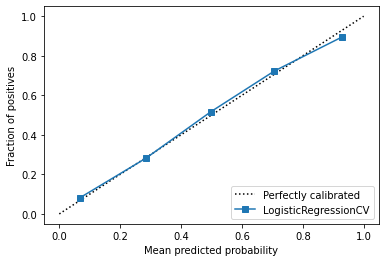

In [12]:
probs = np.max(probabilities, axis=1)
disp = CalibrationDisplay.from_estimator(model, X_test_transformed, y_test)
plt.show()

In [13]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      2207
           1       0.80      0.68      0.74      1011

    accuracy                           0.85      3218
   macro avg       0.83      0.80      0.81      3218
weighted avg       0.84      0.85      0.84      3218

